## Kernel regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kdetools as kt

### Linear regression

Define 'true' function on an interval and add some noise:

In [2]:
np.random.seed(42)
a0, a1 = 8, 2.45
x = np.random.uniform(-200, 200, size=100)
y = a1*x + a0 + np.random.normal(0, 200, size=x.size)

Estimate joint distribution of `x` and `y` and fit KDE:

In [3]:
X = np.stack([x,y])
kde = kt.gaussian_kde(X)
kde.set_bandwidth('cv', bw_type='diagonal')
kde.factor

array([ 28.70290792, 119.61365688])

Take multiple samples of `y` conditional on specified values of `x` and take the mean:

In [4]:
x_test = np.arange(-200,200,1)
y_samp = kde.conditional_resample(1000, x_test[:,None], [0])
y_est = y_samp.mean(axis=1)

Plot:

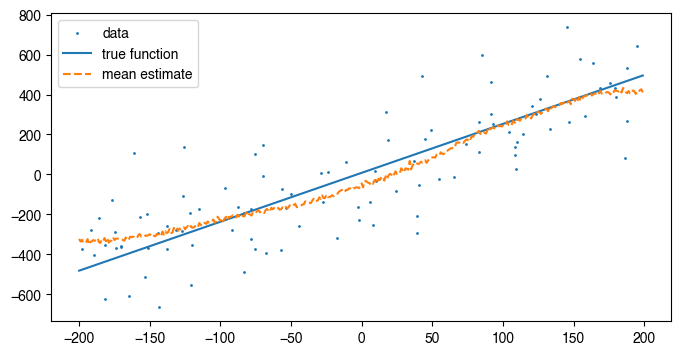

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.scatter(x, y, s=1, label='data');
ax.plot(x_test, a1*x_test + a0, label='true function')
ax.plot(x_test, y_est, ls='--', label='mean estimate')
ax.legend();

### Non-linear regression

Define 'true' function on an interval and add some noise:

In [6]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.normal(size=100) * 0.5

Estimate joint distribution of `x` and `y` and fit KDE:

In [7]:
X = np.stack([x, y])
kde = kt.gaussian_kde(X)
kde.set_bandwidth('cv', bw_type='diagonal')
kde.factor

array([0.31507814, 0.27961306])

Take multiple samples of `y` conditional on specified values of `x` and take the mean:

In [8]:
x_test = np.linspace(0, 2*np.pi, 100)
y_samp = kde.conditional_resample(1000, x_test[:,None], [0])
y_est = y_samp.mean(axis=1)

Plot:

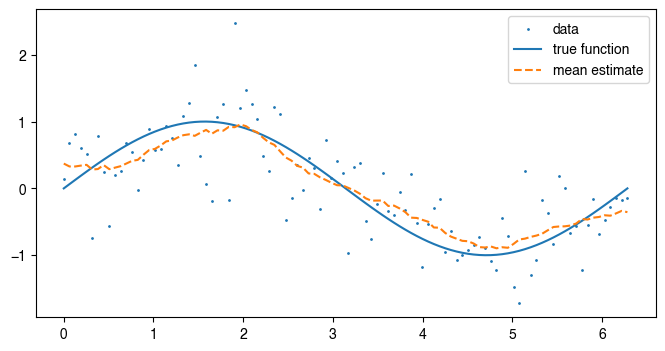

In [9]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.scatter(x, y, s=1, label='data');
ax.plot(x_test, np.sin(x_test), label='true function')
ax.plot(x_test, y_est, ls='--', label='mean estimate')
ax.legend();